Output()

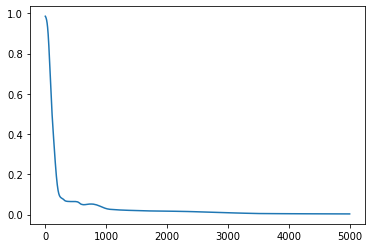

In [2]:
import numpy as np
import tensorflow as tf
from poenta.circuit import Circuit

state_in = np.zeros(10, dtype=np.complex128)
state_in[0] = 1
target_out = np.zeros(10, dtype=np.complex128)
target_out[1] = 1

def loss(target, output):
    return 1 - tf.abs(tf.reduce_sum(output * tf.math.conj(target))) ** 2

device = Circuit(num_layers=5, num_modes=1, num_seed = 665, dtype=tf.complex128)
tuple_in_out = (state_in,target_out),
device.set_input_output_pairs(*tuple_in_out)
device.optimize(loss, steps=5000)

Output()

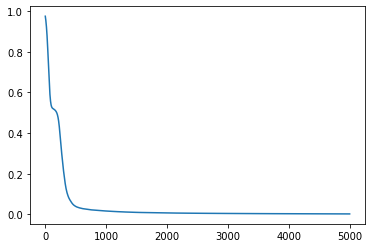

In [5]:
import numpy as np
import tensorflow as tf
from poenta.circuit import Circuit

state_in = np.zeros((10,10), dtype=np.complex128)
state_in[0,0] = 1
target_out = np.zeros((10,10), dtype=np.complex128)
target_out[1,0] = 1

def loss(target, output):
    return 1 - tf.abs(tf.reduce_sum(output * tf.math.conj(target))) ** 2

device = Circuit(num_layers=5, num_modes=2, num_seed = 665, dtype=tf.complex128)
tuple_in_out = (state_in,target_out),
device.set_input_output_pairs(*tuple_in_out)
device.optimize(loss, steps=5000)

Output()

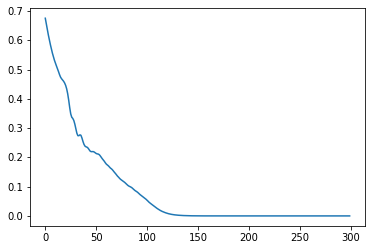

In [1]:
import numpy as np
import tensorflow as tf
from poenta.circuit import Circuit

state_in = np.zeros(50, dtype=np.complex128)
state_in[0] = 1
target_out = np.zeros(50, dtype=np.complex128)
target_out[0] = 0.661
target_out[2] = -0.343
target_out[4] = 0.253
target_out[6] = -0.368
target_out[8] = 0.377
target_out[10] = 0.323
target_out[12] = 0.365


def loss(target, output):
    return 1 - tf.abs(tf.reduce_sum(output * tf.math.conj(target))) ** 2

device = Circuit(num_layers=25, num_modes=1, num_seed = 663, dtype=tf.complex128)
tuple_in_out = (state_in,target_out),
device.set_input_output_pairs(*tuple_in_out)
device.optimize(loss, steps=300)
final_state = device.show_final_state(state_in)

In [5]:
loss(s,target_out)

<tf.Tensor: shape=(), dtype=float64, numpy=5.671481377866883e-07>

/Users/mac/anaconda3/envs/thewalrusenv/lib/python3.6/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


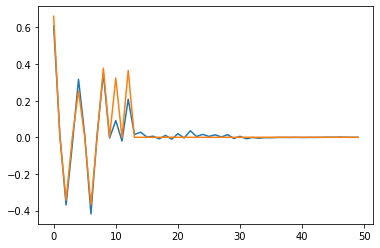

In [13]:
import matplotlib.pyplot as plt
plt.plot(s[0])
plt.plot(target_out)
plt.show()